In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
# state schema
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str
    

In [3]:
def process_values(state: AgentState) -> AgentState:
    state["result"] = f"Hi there {state['name']}, your summ = {sum(state['values'])}"
    return state

In [ ]:
# Create the graph 

graph = StateGraph(AgentState)

graph.add_node("sum", process_values)
graph.set_entry_point("sum")
graph.set_finish_point("sum")

app = graph.compile() # -> save the compiled graph in a variable before invoking it

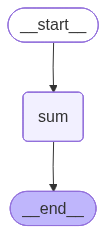

In [5]:
# Visulaize the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
answer = app.invoke({
    "values": [1, 2, 3, 4],
    "name": "Szobozlai"
})

answer["result"]

'Hi there Szobozlai, your summ = 10'